In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

### Read 3 Datasets

In [2]:
ds1radiotemp = pd.read_csv("../../dataset_1_radioTemperatures_20210303.csv",sep=';',dtype={'id_audit':np.str})

In [3]:
ds1radiotemp.head()

,id_field_values,id_ftp,id_audit,value,unit,field
0,41310,108,147,23.5,C,TSensor_D4_
1,41311,108,147,23.8,C,TSensor_D5_
2,41312,108,147,26.3,C,TSensor_D6_
3,41313,108,147,23.5,C,TSensor_D8_
4,41314,108,147,23.0,C,TSensor_D9_


In [4]:
ds2powerclass = pd.read_csv("../../dataset_2_powerClass_20210303.csv", sep=";", dtype={'id_audit':np.str})

In [5]:
ds2powerclass.head()

,id_trx_status,id_audit,branch_header,field,value
0,2917,21,Branch A,powerClass,20W [43.00 dBm]
1,3008,21,Branch B,powerClass,20W [43.00 dBm]
2,3099,21,Branch C,powerClass,20W [43.00 dBm]
3,3190,21,Branch D,powerClass,20W [43.00 dBm]
4,3286,21,Branch E,powerClass,40W [46.15 dBm]


In [6]:
ds2powerclass.sort_values(['id_audit','branch_header']).head(10)

,id_trx_status,id_audit,branch_header,field,value
84905,156077628,1000018,Branch A,powerClass,40W [44.80 dBm]
84906,156077727,1000018,Branch B,powerClass,40W [44.80 dBm]
84907,156077826,1000018,Branch C,powerClass,40W [44.80 dBm]
84908,156077925,1000018,Branch D,powerClass,40W [44.80 dBm]
84909,156078041,1000018,Branch E,powerClass,60W [47.80 dBm]
84910,156078140,1000018,Branch F,powerClass,60W [47.80 dBm]
84911,156078240,1000018,Branch G,powerClass,60W [47.80 dBm]
84912,156078351,1000018,Branch H,powerClass,60W [47.80 dBm]
87177,156080912,1000033,Branch A,powerClass,40W [46.00 dBm]
87178,156081014,1000033,Branch B,powerClass,40W [46.00 dBm]


In [7]:
ds3radioid = pd.read_csv("../../dataset_3_radioId_20210303.csv",sep=";", dtype={'id_audit':np.str})

In [8]:
ds3radioid.head()

,id_audit,customer,serial
0,21,2,15551
1,23,2,15403
2,25,2,16084
3,147,2,17087
4,746,2,15486


### Check if exists any empty records in radio Temp dataset
* Here we found 641 records without temperatures
* Sounds mostly due to "Error: Command unsupported"
* TSensor_N22_ seems not working at all
* At this stage, we just remove those records

In [9]:
ds1radiotemp.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238259 entries, 0 to 3238258
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id_field_values  3238259 non-null  int64  
 1   id_ftp           3238259 non-null  int64  
 2   id_audit         3238259 non-null  object 
 3   value            3237618 non-null  float64
 4   unit             3238259 non-null  object 
 5   field            3238259 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 148.2+ MB


In [10]:
ds1radiotemp.isnull().sum()

id_field_values      0
id_ftp               0
id_audit             0
value              641
unit                 0
field                0
dtype: int64

In [11]:
ds1radiotemp[ds1radiotemp.value.isnull()].groupby('unit').count()

,id_field_values,id_ftp,id_audit,value,field
unit,,,,,
Error: Command unsupported,596,596,596,0,596
Error: Link BXP_2048 is not accessible. Please typ,1,1,1,0,1
Error: Link BXP_2049 is not accessible. Please typ,2,2,2,0,2
Error: Link BXP_2053 is not accessible. Please typ,2,2,2,0,2
Error: Link BXP_2054 is not accessible. Please typ,1,1,1,0,1
Error: Link BXP_2063 is not accessible. Please typ,1,1,1,0,1
Error: Link BXP_2064 is not accessible. Please typ,1,1,1,0,1
remote shell died,2,2,2,0,2
ts,2,2,2,0,2


In [12]:
ds1radiotemp[ds1radiotemp.value.isnull()].groupby('field').count()

,id_field_values,id_ftp,id_audit,value,unit
field,,,,,
TSensor_E20_,1,1,1,0,1
TSensor_I21_,2,2,2,0,2
TSensor_N22_,638,638,638,0,638


In [13]:
ds1radiotemp.dropna(inplace=True)

In [14]:
ds1radiotemp.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237618 entries, 0 to 3238258
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id_field_values  3237618 non-null  int64  
 1   id_ftp           3237618 non-null  int64  
 2   id_audit         3237618 non-null  object 
 3   value            3237618 non-null  float64
 4   unit             3237618 non-null  object 
 5   field            3237618 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 172.9+ MB


### Check if exists any empty records in powerclass dataset
* no missing data

In [15]:
ds2powerclass.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366812 entries, 0 to 366811
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_trx_status  366812 non-null  int64 
 1   id_audit       366812 non-null  object
 2   branch_header  366812 non-null  object
 3   field          366812 non-null  object
 4   value          366812 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.0+ MB


### Check if exists any empty records in radioId dataset
* no missing data

In [16]:
ds3radioid.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74908 entries, 0 to 74907
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_audit  74908 non-null  object
 1   customer  74908 non-null  int64 
 2   serial    74908 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


### Find out basic data structure
* Total Audit, 67455
    * **each audit contains 48 records** 
    * But data is not full clean. 67455 * 48 = 3237840 (a slight bigger than cleaned data 3237618), less than 3238259 
    * Indicates some audit does not contains 48 records, maybe because of less branches, or because of less sensors
* Total Type of Sensor 71
* Total Serial 27781 
    * *Not sure how Serial is associated to the type of Sensor.* 
    * *Not sure if all sensors of the same type is the same hardware/firmware or different serials incidates different hardware/firmware*
    * *It sounds* **one audit connects one Serials** but ppt said several audit could share the same serials.
    * This field sounds not useable, since it cannot connect to set of sensor clearly, even this might tell the firmware version, and impact temperature
* Total Branch 8
    * *It sounds* **each audit contains 8 branches, therefore, 6 sensors per branch**
* Total PowerClass 366812
    * **each branch contains a powerclass setup** This indicates 6 sensors share the same powerclass setup
    * **Not all audit has powerclass setup** 45854 < 67455 This indicates data is not clean. might remove those dirty audits or use some "default" value
    * **not all branches have powerclass setup (E,F,G,H braches)** This could be because no sensor is installed for E/F/G/H, or not have powerclass setup value. Need further check
    * *Not sure how to link powerclass to a particular set of sensors, among 48 sensors per audit* 
    * We might have to restore powwerclass-sensor relationship from data
* Total 2 customers
    * *Not sure different customers could have different usage/setup, so that temperatures will be highly different* This can be found out by joining the ds1 and ds3.

In [17]:
ds1radiotemp['id_audit'].nunique()

67455

In [18]:
67455 * 48

3237840

In [19]:
ds1radiotemp['field'].nunique()

71

In [20]:
ds3radioid.serial.nunique()

27781

In [21]:
ds1radiotemp[['id_audit','value']].groupby('id_audit').count().head()

,value
id_audit,
1000033,48
1000034,48
1000035,48
1000044,48
1000047,48


In [22]:
ds2powerclass['branch_header'].value_counts()

Branch D    45854
Branch A    45854
Branch B    45854
Branch C    45854
Branch G    45849
Branch H    45849
Branch F    45849
Branch E    45849
Name: branch_header, dtype: int64

In [23]:
ds2powerclass['id_audit'].nunique()

45854

In [24]:
ds3radioid['id_audit'].nunique()

74908

In [25]:
ds3radioid.customer.nunique()

2

### Check temperature distribution
* Some sensors report negative values, this sounds not reasonable. But this might indicate weather temperature could impact record .For example, maybe sensor operates outside, in cold weather. 
* However, we dont have weather temperature. (*same physical location shall have similar weather temperature. If we can get location information from data, it will be good feature for modelling*)
* From quantile, most negative gathers between -1.8 and -9.1, further negative -20 sounds abnormal.
* Data is postive skew. Some extreme postive value exists
* For postive temperatures, quite large range exists, maybe because different type of hardware, sensor, powerclass. need more study

In [26]:
ds1radiotemp.describe()

,id_field_values,id_ftp,value
count,3.237618e+06,3.237618e+06,3.237618e+06
mean,2.161187e+08,1.249882e+06,2.181192e+02
std,6.049992e+07,6.919730e+05,3.226914e+05
min,2.879000e+03,6.600000e+01,-1.358920e+08
25%,1.724590e+08,6.421530e+05,3.530000e+01
50%,2.168083e+08,1.023979e+06,5.100000e+01
75%,2.642005e+08,1.910502e+06,7.580000e+01
max,3.363118e+08,2.520246e+06,1.682010e+08


In [27]:
Q1 = ds1radiotemp['value'].quantile(0.25)
Q3 = ds1radiotemp['value'].quantile(0.75)
IQR = Q3 - Q1
Q1out = Q1 - 1.5 * IQR
Q3out = Q3 + 1.5 * IQR
print("25% Quantile: ", Q1, "##75% Quantile: ", Q3, "##IQR: ", IQR, "##Q1 outlier: ", Q1out, "##Q3 outlier:", Q3out)

25% Quantile:  35.3 ##75% Quantile:  75.8 ##IQR:  40.5 ##Q1 outlier:  -25.450000000000003 ##Q3 outlier: 136.55


In [28]:
ds1radiotemp['value'].skew()

211.53065954472737

In [29]:
ds1radiotemp_neg = ds1radiotemp[ds1radiotemp['value'] < 0]

In [30]:
ds1radiotemp_neg.describe()

,id_field_values,id_ftp,value
count,1.024900e+04,1.024900e+04,1.024900e+04
mean,1.867399e+08,7.745260e+05,-7.957169e+04
std,3.327580e+07,2.135414e+05,3.287174e+06
min,1.851242e+07,5.554100e+04,-1.358920e+08
25%,1.831541e+08,7.221950e+05,-9.100000e+00
50%,1.948587e+08,8.026730e+05,-4.600000e+00
75%,2.028220e+08,8.642820e+05,-1.800000e+00
max,3.071765e+08,2.350504e+06,-1.000000e-01


In [31]:
Q1 = ds1radiotemp_neg['value'].quantile(0.25)
Q3 = ds1radiotemp_neg['value'].quantile(0.75)
IQR = Q3 - Q1
Q1out = Q1 - 1.5 * IQR
print("25% Quantile: ", Q1, "##75% Quantile: ", Q3, "##IQR: ", IQR, "##Q1 outlier: ", Q1out)

25% Quantile:  -9.1 ##75% Quantile:  -1.8 ##IQR:  7.3 ##Q1 outlier:  -20.049999999999997


In [32]:
#mybins = pd.qcut(ds1radiotemp['value'], q=4, labels = ['lower','low','high','higher'])
cut_bins = [float("-inf"), -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,float("inf")]
mybins = pd.cut(ds1radiotemp['value'], bins=cut_bins)

In [33]:
mybins.value_counts().sort_index()

(-inf, -30.0]        481
(-30.0, -20.0]       228
(-20.0, -10.0]      1487
(-10.0, 0.0]        8731
(0.0, 10.0]        53478
(10.0, 20.0]      169256
(20.0, 30.0]      329878
(30.0, 40.0]      504262
(40.0, 50.0]      509375
(50.0, 60.0]      387066
(60.0, 70.0]      293431
(70.0, 80.0]      319676
(80.0, 90.0]      336954
(90.0, 100.0]     290258
(100.0, inf]       33057
Name: value, dtype: int64

In [34]:
ds1radiotemp['bin'] = mybins

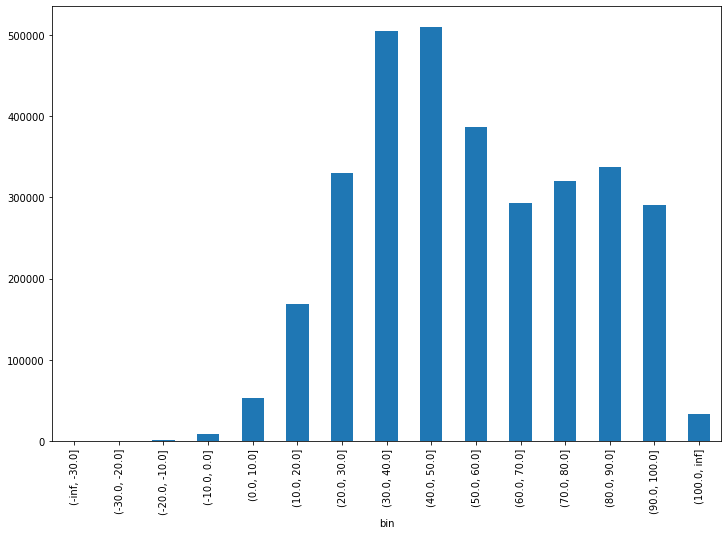

In [35]:
fig, ax = plt.subplots(figsize=(12,8)) 
df2 = ds1radiotemp.groupby('bin').count()
df2['value'].plot(kind='bar', ax=ax)

### Check temperature distribution per audit
* Sounds different audit has large different range. Need found out the reason


In [36]:
ds1radiotemp.id_audit.unique()

array(['147', '746', '599167', ..., '1970427', '1970491', '1970516'],
      dtype=object)

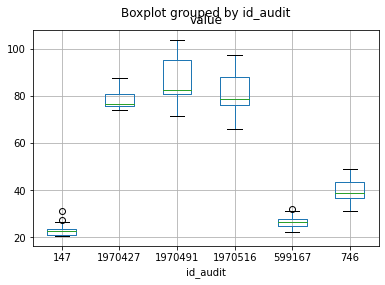

In [37]:
ds1radiotemp[(ds1radiotemp.id_audit == '147') | (ds1radiotemp.id_audit == '746')
             | (ds1radiotemp.id_audit == '599167')
             | (ds1radiotemp.id_audit == '1970427')
             | (ds1radiotemp.id_audit == '1970491')
             | (ds1radiotemp.id_audit == '1970516')].boxplot(column='value', by='id_audit')

### Check temperature distribution per sensor
* **It indicates 2 differnt temperature segments.** 
* This might explain S1/S2 connets to power amplifier, S3-S9 connects to ohter HW on the radio
* Need find out which sensors are S1/S2, which are S3-S9, or just clustering into 2 groups sounds OK
* When clustering, a little bit concern about outliers might influence, so that sensores are classified into different group.

In [38]:
pd.set_option('display.max_rows', 500)

In [39]:
my_orderData = ds1radiotemp.groupby(by=["field"])["value"].median().sort_values(ascending=False)
my_orderData

field
TSensor_P32_    56.80
TSensor_P31_    56.80
TSensor_D18_    56.50
TSensor_P24_    56.00
TSensor_T66_    56.00
TSensor_P33_    55.50
TSensor_P25_    55.10
TSensor_T67_    55.10
TSensor_T56_    53.50
TSensor_T65_    53.50
TSensor_P23_    53.50
TSensor_T55_    53.50
TSensor_R49_    52.90
TSensor_R50_    52.90
TSensor_P34_    52.50
TSensor_D19_    52.10
TSensor_P36_    52.00
TSensor_P37_    51.60
TSensor_T58_    51.50
TSensor_T57_    51.50
TSensor_T68_    51.50
TSensor_P26_    51.50
TSensor_P38_    51.30
TSensor_P28_    51.00
TSensor_T70_    50.90
TSensor_R52_    50.80
TSensor_R51_    50.80
TSensor_R48_    50.60
TSensor_R47_    50.60
TSensor_P29_    50.50
TSensor_T71_    50.50
TSensor_P35_    50.00
TSensor_C1_     50.00
TSensor_P27_    49.50
TSensor_T59_    49.50
TSensor_T60_    49.50
TSensor_T69_    49.50
TSensor_D6_     49.50
TSensor_T64_    49.40
TSensor_P30_    49.10
TSensor_T61_    49.10
TSensor_T62_    49.10
TSensor_T72_    49.10
TSensor_W74_    49.00
TSensor_W73_    49.00
TSen

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222A0875D30>]],
      dtype=object)

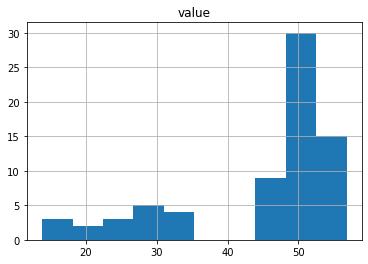

In [40]:
ds1radiotemp[['field','value']].groupby('field').median().sort_values(ascending=False, by='value').hist()

In [41]:
my_order = my_orderData.index

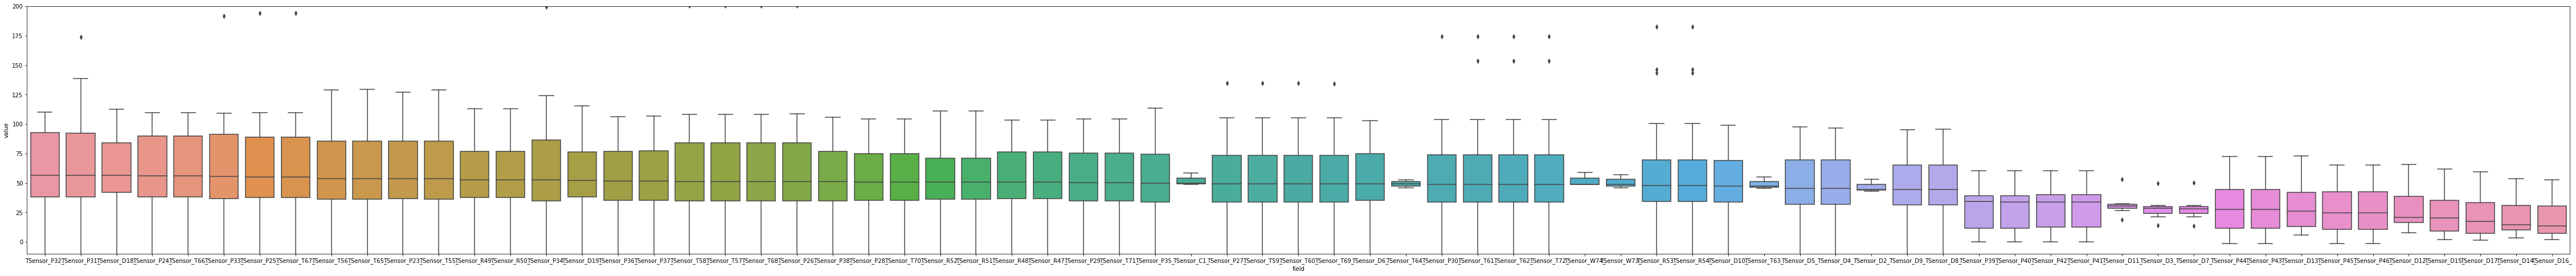

In [42]:
fig, ax = plt.subplots(figsize=(80,8)) 
ax.set(ylim=(-10, 200))
sns.boxplot(x='field', y='value', data=ds1radiotemp, ax=ax, order=my_order)

### Check temperature distribution per customer
* 2 customers similar distribution, although the 2nd customer more variance

In [43]:
ds13join = ds1radiotemp.merge(ds3radioid,sort=False)

In [44]:
ds13join.head()

,id_field_values,id_ftp,id_audit,value,unit,field,bin,customer,serial
0,41310,108,147,23.5,C,TSensor_D4_,"(20.0, 30.0]",2,17087
1,41311,108,147,23.8,C,TSensor_D5_,"(20.0, 30.0]",2,17087
2,41312,108,147,26.3,C,TSensor_D6_,"(20.0, 30.0]",2,17087
3,41313,108,147,23.5,C,TSensor_D8_,"(20.0, 30.0]",2,17087
4,41314,108,147,23.0,C,TSensor_D9_,"(20.0, 30.0]",2,17087


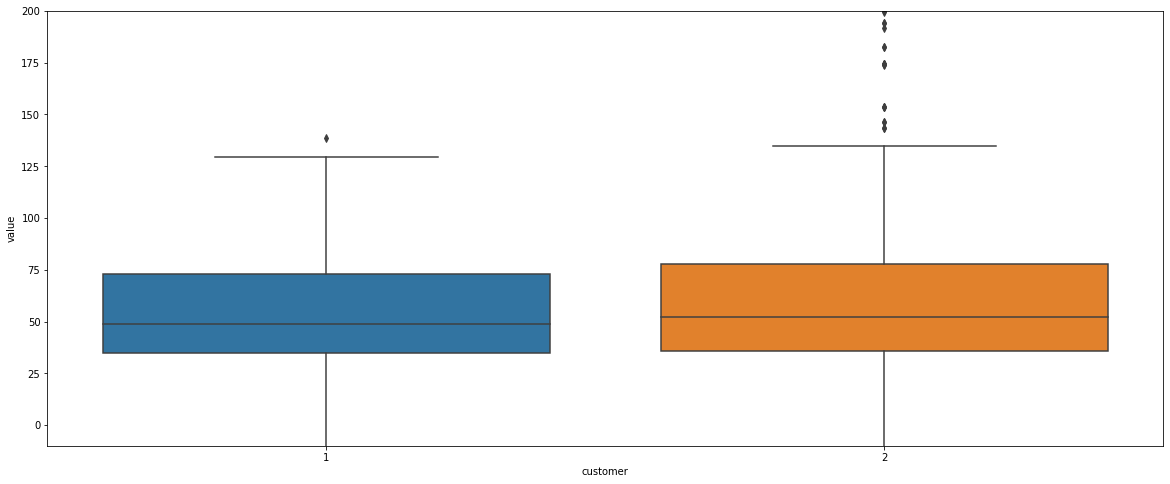

In [45]:
fig, ax = plt.subplots(figsize=(20,8)) 
ax.set(ylim=(-10, 200))
sns.boxplot(x='customer', y='value', data=ds13join, ax=ax)